<a href="https://colab.research.google.com/github/maridufo/UDEA/blob/main/Taller_4_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.covariance import EllipticEnvelope
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
from statsmodels.formula.api import ols
import itertools


#Talller

Marìa Camila Duarte

Cristian Lozano

Cristian Sanchez

## Enunciado
En un estudio a gran escala realizado en EE.UU sobre la eficacia en el control de
infecciones hospitalarias se recogió información en 113 hospitales. A su equipo de trabajo
le corresponde analizar una muestra aleatoria de n hospitales, que están dentro de un
archivo de texto etiquetado GrupoX.txt, donde n es el número de registros en el archivo
asignado y X es el número de equipo asignad. La base de datos contiene las siguientes
columnas (variables):
Y: Riesgo de infección Probabilidad promedio estimada de adquirir infección en el
hospital (en porcentaje).
X 1 : Duración de la estadía Duración promedio de la estadía de todos los pacientes en el
hospital (en días).
X 2 : Rutina de cultivos Razón del número de cultivos realizados en pacientes sin
síntomas de infección hospitalaria, por cada 100.
X 3 : Número de camas Número promedio de camas en el hospital durante el periodo del
estudio.
X 4 : Censo promedio diario Número promedio de pacientes en el hospital por día durante
el periodo del estudio.
X 5 : Número de enfermeras Número promedio de enfermeras, equivalentes a tiempo
completo, durante el periodo del estudio.

In [3]:
df = pd.read_csv('/content/Grupo4.txt', sep = ' ')
df

,Y,X1,X2,X3,X4,X5
0,5.0,7.78,45.5,20.9,71.6,489
1,2.9,8.86,51.3,9.5,87.5,100
2,4.4,11.65,54.5,18.6,96.1,248
3,1.8,7.67,51.7,2.5,40.4,106
4,4.6,10.16,54.2,8.4,51.5,831
...,...,...,...,...,...,...
64,6.5,19.56,59.9,17.2,113.7,306
65,1.4,7.14,51.7,4.1,45.7,115
66,4.5,8.28,48.1,26.0,101.8,108
67,5.6,8.95,53.7,18.9,122.8,147


# 1. Emplee el análisis de regresión lineal múltiple que explique el riesgo de infección en términos de las variables restantes (actuando como predictoras X i )



In [4]:
model = (
    smf.ols(
        formula = 'Y~X1+X2+X3+X4+X5',
        data = df
    )
.fit()

)

model. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     20.87
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.09e-12
Time:                        21:24:20   Log-Likelihood:                -77.779
No. Observations:                  69   AIC:                             167.6
Df Residuals:                      63   BIC:                             181.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2449      1.231     -0.199      0.843      -2.705       2.215
X1             0.1836      0.062      2.941      0.005       0.059       0.308
X2             0.0208      0.024      0.870      0.388      -0.027       0.069
X3             0.0689      0.011      6.098      0.000       0.046       0.091
X4             0.0044      0.006      0.770      0.444      -0.007       0.016
X5             0.0016      0.001      2.762      0.008       0.000       0.003
==============================================================================
Omnibus:                        0.101   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.118
Skew:                           0.080   Prob(JB):                        0.943
Kurtosis:                       2.875   Cond. No.                     4.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ***Análisis:*** El coeficiente de determinación (R-cuadrado) del modelo es 0.624, lo que indica que aproximadamente el 62.4% de la variabilidad en la variable dependiente Y puede ser explicada por las variables predictoras incluidas en el modelo.Los coeficientes para las variables predictoras X1, X2 y X3, dado sus coeficientes parecen ser los más significativos para Y .

# 2. Identifique observaciones que puedan considerarse problemáticas (datos atípicos,puntos de balanceo e influyentes) y analice si debe eliminarlas de su conjunto de datos o no, justifique. Repita la construcción del modelo de regresión si eliminó observaciones.

In [5]:
# Residuales escalados, Residuales estandarizados (di)

residuales = model.resid
X = model.model.exog
hat_matrix = np.dot(X, np.dot(np.linalg.inv(np.dot(X.T, X)), X.T))
MSE = np.mean(residuales**2)
residuales_estandarizados = residuales / np.sqrt(MSE * (1 - np.diag(hat_matrix)))
residuales_mayores_a_3 = np.abs(residuales_estandarizados) > 3
indices_residuales_mayores_a_3 = np.where(residuales_mayores_a_3)[0]
indices_residuales_mayores_a_3

array([], dtype=int64)

## ***Análisis:*** Bajo la metodología de edtandarizar los residuales, no se identificaron valores atipicos.



In [6]:
# Puntos de balanceo
umbral_balanceo = 2 * (5 + 1) / len(df)
indices_puntos_balanceo = np.where(np.diag(hat_matrix) > umbral_balanceo)[0]
df.iloc[indices_puntos_balanceo]

,Y,X1,X2,X3,X4,X5
4,4.6,10.16,54.2,8.4,51.5,831
6,5.8,9.50,49.3,42.0,70.9,98
13,4.9,11.07,53.2,28.5,122.0,768
34,7.8,12.07,43.7,52.4,105.3,157
39,7.7,12.78,56.8,46.0,116.9,322
54,6.6,13.95,65.9,15.6,133.5,356
57,3.4,8.45,38.8,12.9,85.0,235
64,6.5,19.56,59.9,17.2,113.7,306


## Experimento eliminando los puntos de balanceo para validar su impacto en el modelo.

In [7]:
df_spb = df.drop(indices_puntos_balanceo)
df_spb

,Y,X1,X2,X3,X4,X5
0,5.0,7.78,45.5,20.9,71.6,489
1,2.9,8.86,51.3,9.5,87.5,100
2,4.4,11.65,54.5,18.6,96.1,248
3,1.8,7.67,51.7,2.5,40.4,106
5,2.6,9.76,53.2,6.9,80.1,64
...,...,...,...,...,...,...
63,4.2,8.88,51.5,10.1,86.9,305
65,1.4,7.14,51.7,4.1,45.7,115
66,4.5,8.28,48.1,26.0,101.8,108
67,5.6,8.95,53.7,18.9,122.8,147


In [8]:
model_spb = (
    smf.ols(
        formula = 'Y~X1+X2+X3+X4+X5',
        data = df_spb
    )
.fit()

)

model_spb. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     11.39
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.44e-07
Time:                        21:24:33   Log-Likelihood:                -68.257
No. Observations:                  61   AIC:                             148.5
Df Residuals:                      55   BIC:                             161.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0518      1.704      0.030      0.976      -3.364       3.467
X1             0.1429      0.085      1.678      0.099      -0.028       0.314
X2             0.0152      0.030      0.507      0.614      -0.045       0.075
X3             0.0655      0.016      4.207      0.000       0.034       0.097
X4             0.0077      0.007      1.164      0.249      -0.006       0.021
X5             0.0024      0.001      3.396      0.001       0.001       0.004
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.865
Skew:                           0.406   Prob(JB):                        0.394
Kurtosis:                       2.728   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ***Análisis:*** Sin los puntos de balanceo el Rcuadrado y la R cuadrado ajustada disminuyen, por lo que se dejaran los puntos de balanceo en el modelo para evitar los efectos negativos.


##Se calculan los puntos influyentes usando el DataFrame original

In [9]:
#Puntos influyentes, metodo distancia cook
influence = model.get_influence()
cook_distance = influence.cooks_distance[0]
puntos_influyentes = np.where(cook_distance > 4 / len(X))[0]
df.iloc[puntos_influyentes]

,Y,X1,X2,X3,X4,X5
13,4.9,11.07,53.2,28.5,122.0,768
62,3.1,9.41,59.5,20.6,91.7,29


## ***Análisis:*** Se procede con la eliminación de los puntos influyentes.



In [10]:
df_sf = df.drop(puntos_influyentes)
df_sf

,Y,X1,X2,X3,X4,X5
0,5.0,7.78,45.5,20.9,71.6,489
1,2.9,8.86,51.3,9.5,87.5,100
2,4.4,11.65,54.5,18.6,96.1,248
3,1.8,7.67,51.7,2.5,40.4,106
4,4.6,10.16,54.2,8.4,51.5,831
...,...,...,...,...,...,...
64,6.5,19.56,59.9,17.2,113.7,306
65,1.4,7.14,51.7,4.1,45.7,115
66,4.5,8.28,48.1,26.0,101.8,108
67,5.6,8.95,53.7,18.9,122.8,147


## ***Análisis:*** Se corre de nuevo el modelo, sin los influyentes.

In [11]:
model_1 = (
    smf.ols(
        formula = 'Y~X1+X2+X3+X4+X5',
        data = df_sf
    )
.fit()

)

model_1. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     25.45
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           9.08e-14
Time:                        21:24:45   Log-Likelihood:                -70.763
No. Observations:                  67   AIC:                             153.5
Df Residuals:                      61   BIC:                             166.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9805      1.173     -0.836      0.406      -3.326       1.365
X1             0.1445      0.059      2.430      0.018       0.026       0.263
X2             0.0327      0.023      1.433      0.157      -0.013       0.078
X3             0.0732      0.011      6.895      0.000       0.052       0.094
X4             0.0086      0.006      1.552      0.126      -0.002       0.020
X5             0.0021      0.001      3.519      0.001       0.001       0.003
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.903
Skew:                           0.412   Prob(JB):                        0.386
Kurtosis:                       2.961   Cond. No.                     4.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ***Análisis:*** Se observa que con la eliminación de los influyentes el modelo  el R-cuadrado y el R-cuadrado ajustado aumentaron respecto al modelo anterior, por lo tanto la base para el modelo sera el DataFrame df_sf, el cual no posee los puntos influyentes.


# 3. Realice la prueba de significancia del modelo, interprete.

Prueba de significancia con alpha = 0.05, done:

H0 = las variables predictoras no tienen un efecto significativo en Y. Beta = 0

Ha =  el coeficiente de regresión beta es diefrente de 0 lo que implica que la variable predictora xtiene un efecto significativo en la variable Y

  Si F > ALPHA osea que,  Prob (F-statistic)< Alpha :  Rechazo H0


In [12]:
p_valor_de_F = model_1.f_pvalue
if p_valor_de_F < 0.05:
 print(True)


True



##***Análisis:*** El modelo es significativo a un nivel de significancia del 5%. Esto sugiere que al menos una de las variables predictoras tiene un efecto significativo en la variable dependiente.




# 4. Obtener el coeficiente de determinación y el coeficiente de determinación ajustado. Interprete.

In [13]:
R_cuadrado = model_1.rsquared
R_cuadrado_ajustado = model_1.rsquared_adj
print("Coeficiente de determinación (R^2):", R_cuadrado)
print("Coeficiente de determinación ajustado (R^2 ajustado):", R_cuadrado_ajustado)

Coeficiente de determinación (R^2): 0.6759334143917985
Coeficiente de determinación ajustado (R^2 ajustado): 0.6493705795058804



##***Análisis:*** El Rcuadrado = 0.6759 indica que aproximadamente el 68% de la variabilidad en la variable dependiente es explicada por las variables predictoras incluidas en el modelo. Rcuadrado_ ajustado = 0.6493:cuanto más alto mejor sera la capacidad del modelo, 0.6493 indica un buen ajuste del modelo a los datos.

#5. Analice si hay problemas de multicolinealidad.
##multi colinealidad

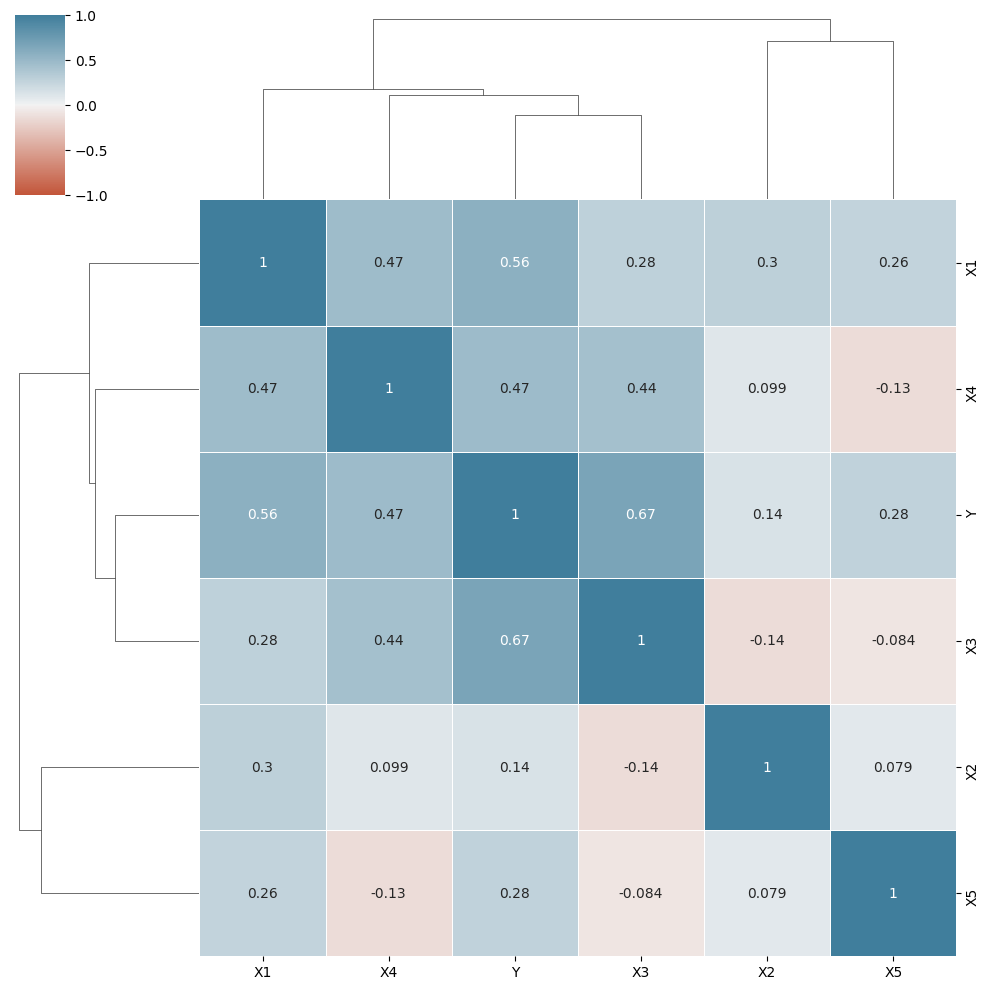

In [14]:
#Matriz de correlación

sns.clustermap(
    data = df_sf.corr(),
    cmap = sns.diverging_palette(20,230, as_cmap= True),
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)


##***Análisis:*** las variables independientes no estan fuertemente relacionadas.

In [15]:
#VIF: Factor de inflación de varianza

X = df_sf[['X1','X2','X3','X4','X5']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIFs"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

  feature        VIFs
0   const  173.333660
1      X1    1.646238
2      X2    1.165299
3      X3    1.331166
4      X4    1.571545
5      X5    1.182562



##***Análisis:***  los VIF son relativamente bajos para todas las variables, lo que sugiere que no hay un problema  de multicolinealidad en el modelo, ya que todos son menores a 5, indicando que no hay multicolinealidad.

#6. Realice una selección de variables por el método que prefiera, tome decisiones,explique.

In [25]:
from dataclasses import replace
combinations = []
for i in range(5):
  combinations.append(list(itertools.combinations(X[['X1','X2','X3','X4','X5']].columns, i+1)))
print(combinations)
todos = []

for i in combinations:
  for j in i:
    formula = "Y~"
    for k in j:
      formula += "+"+k
      formula = formula.replace("~+","~")
    # print(formula)
    # print(formula.replace("~+","~"))
    model=(
        smf.ols(
            formula,
            df
        )
    ).fit()
    todos.append([formula,model.rsquared_adj,model.mse_resid,model.ssr,len(j)])

[[('X1',), ('X2',), ('X3',), ('X4',), ('X5',)], [('X1', 'X2'), ('X1', 'X3'), ('X1', 'X4'), ('X1', 'X5'), ('X2', 'X3'), ('X2', 'X4'), ('X2', 'X5'), ('X3', 'X4'), ('X3', 'X5'), ('X4', 'X5')], [('X1', 'X2', 'X3'), ('X1', 'X2', 'X4'), ('X1', 'X2', 'X5'), ('X1', 'X3', 'X4'), ('X1', 'X3', 'X5'), ('X1', 'X4', 'X5'), ('X2', 'X3', 'X4'), ('X2', 'X3', 'X5'), ('X2', 'X4', 'X5'), ('X3', 'X4', 'X5')], [('X1', 'X2', 'X3', 'X4'), ('X1', 'X2', 'X3', 'X5'), ('X1', 'X2', 'X4', 'X5'), ('X1', 'X3', 'X4', 'X5'), ('X2', 'X3', 'X4', 'X5')], [('X1', 'X2', 'X3', 'X4', 'X5')]]


In [26]:
d = {"modelo":[filas[0] for filas in todos],"R":[filas[1] for filas in todos],"error_ajustado":[filas[2] for filas in todos]}
resultado = pd.DataFrame(data=d)

In [27]:
SSE = np.array([filas[3] for filas in todos])
P = np.array([filas[4] for filas in todos])

Cp = (SSE/todos[30][2])- (len(df)-2*P)
print(Cp,len(Cp),np.min(Cp),np.where(Cp == np.min(Cp)))

[47.44523405 98.41261112 29.77708524 65.50762908 86.41368071 48.93343431
  6.28666699 41.47424252 46.07345217 25.99948267 66.92993952 86.94361591
 26.39656683 15.95957048 51.57254394  7.72556005 43.08110517 47.64279252
  8.15902601  1.41668505 37.47230018 24.34071157 12.98078533 53.26651503
 11.92598705  9.62661968  2.59241927 39.1907049   2.75620954 10.65208243
  4.        ] 31 1.4166850538590978 (array([19]),)


In [29]:
analisis = pd.DataFrame()
analisis["modelo"] = [filas[0] for filas in todos]
analisis["Cp"] = Cp
analisis["R2 ajust"] = [filas[1] for filas in todos]
analisis["MSE"] = [filas[2] for filas in todos]
analisis

,modelo,Cp,R2 ajust,MSE
0,Y~X1,47.445234,0.305863,1.043889
1,Y~X2,98.412611,-0.003266,1.508777
2,Y~X3,29.777085,0.413025,0.882732
3,Y~X4,65.507629,0.196311,1.208641
4,Y~X5,86.413681,0.069511,1.399331
5,Y~X1+X2,48.933434,0.298497,1.054966
6,Y~X1+X3,6.286667,0.561079,0.660079
7,Y~X1+X4,41.474243,0.344425,0.985898
8,Y~X1+X5,46.073452,0.316107,1.028484
9,Y~X2+X3,25.999483,0.439705,0.842609


##***Análisis:***  al evaluar los modelos en la tabla, tomando aquellos con valores más bajos de Cp y MSE, y valores más altos de Rcuadrado ajustado,  ya que indican un mejor ajuste y capacidad predictiva del modelo. Se infiere que el modelo 30.


#7. Realice una predicción utilizando el modelo seleccionado, interprete.

## Se realizar con el modelo 11

In [30]:
model_final = smf.ols(formula='Y~X1+X2+X3+X4+X5', data=df_sf).fit()

model_final. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     25.45
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           9.08e-14
Time:                        21:37:18   Log-Likelihood:                -70.763
No. Observations:                  67   AIC:                             153.5
Df Residuals:                      61   BIC:                             166.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9805      1.173     -0.836      0.406      -3.326       1.365
X1             0.1445      0.059      2.430      0.018       0.026       0.263
X2             0.0327      0.023      1.433      0.157      -0.013       0.078
X3             0.0732      0.011      6.895      0.000       0.052       0.094
X4             0.0086      0.006      1.552      0.126      -0.002       0.020
X5             0.0021      0.001      3.519      0.001       0.001       0.003
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.903
Skew:                           0.412   Prob(JB):                        0.386
Kurtosis:                       2.961   Cond. No.                     4.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##***Análisis:***  

Rcuadrado: ignifica que aproximadamente el 67.6% de la variabilidad en la variable dependiente Y es explicada por las variables predictoras en el modelo.

Las variable x1 es la que más influencia tiene en 'Y'dado su coeficiente.

In [37]:
models_results = pd.DataFrame(
            dict(actual_value = df_sf.Y,
                prediction_model_final= model_final.predict(),
            )
)
models_results

,actual_value,prediction_model_final
0,5.0,4.790392
1,2.9,3.636498
2,4.4,5.189934
3,1.8,2.571216
4,4.6,5.037291
...,...,...
64,6.5,6.678900
65,1.4,2.676046
66,4.5,4.794969
67,5.6,4.817643


<Axes: ylabel='Density'>

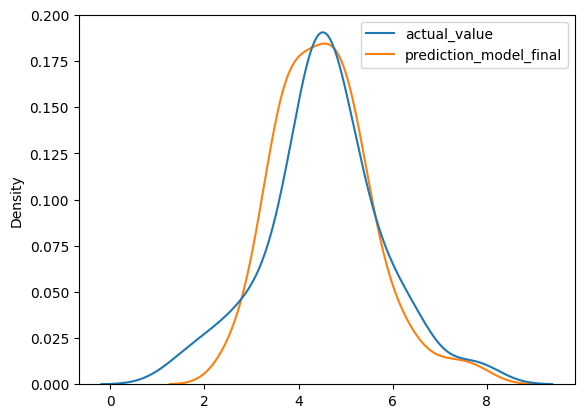

In [38]:
# comparativo de la distribución de  densidad de probabilidad actual vs predicción
sns.kdeplot(
    data= models_results

)

##***Análisis:***  

Podemos observar que el comportamiento de la distribución de la densidad de probabilidad de los modelos se comportan similar, aunque parece a que la distribución de la predicción se ocmprota de forma más normal al tener menos curtosis.